In [22]:
import numpy as np
import cv2
import imutils
import matplotlib.pyplot as plt
from imutils.contours import sort_contours


<function matplotlib.pyplot.show(close=None, block=None)>

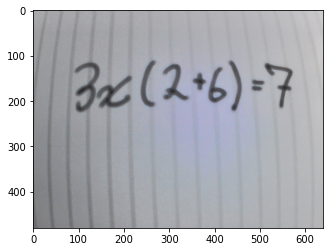

In [19]:
img = cv2.imread('saved_img.jpg')
plt.imshow(img)
plt.show

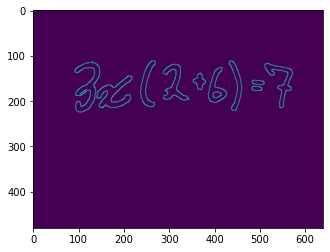

In [16]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(blurred, 30, 150)
plt.imshow(edged)

In [26]:
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sort_contours(cnts, method="left-to-right")[0]
chars = []


In [27]:
for c in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
    if (w >= 5 and w <= 150) and (h >= 15 and h <= 120):
        roi = gray[y:y + h, x:x + w]
        thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        (tH, tW) = thresh.shape
    if tW > tH:
        thresh = imutils.resize(thresh, width=32)
    else:
        thresh = imutils.resize(thresh, height=32)

In [29]:
(tH, tW) = thresh.shape
dX = int(max(0, 45 - tW) / 2.0)
dY = int(max(0, 45 - tH) / 2.0)
padded = cv2.copyMakeBorder(thresh, top=dY, bottom=dY,
                            left=dX, right=dX, borderType=cv2.BORDER_CONSTANT,
                            value=(0, 0, 0))
padded = cv2.resize(padded, (45, 45))
padded = padded.astype("float32") / 255.0
padded = np.expand_dims(padded, axis=-1)
chars.append((padded, (x, y, w, h)))

In [ ]:
boxes = [b[1] for b in chars]
chars = np.array([c[0] for c in chars], dtype="float32")
preds = model.predict(chars)